In [1]:
import sklearn
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfTransformer
#from sklearn.naive_bayes import MultinomialNB
#from sklearn.linear_model import SGDClassifier
import numpy as np
import pandas as pd
import nltk
from nltk import RegexpTokenizer
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk.stem.lancaster import LancasterStemmer
from scipy.sparse import coo_matrix, hstack

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
data = pd.read_csv('/content/drive/MyDrive/quora_train.csv',engine='python')


In [4]:
data = data.drop(columns=['id', 'qid1','qid2'])
data

,question1,question2,is_duplicate
0,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0
...,...,...,...
404285,How many keywords are there in the Racket prog...,How many keywords are there in PERL Programmin...,0
404286,Do you believe there is life after death?,Is it true that there is life after death?,1
404287,What is one coin?,What's this coin?,0
404288,What is the approx annual cost of living while...,I am having little hairfall problem but I want...,0


In [5]:
data = data.fillna(' ')

In [6]:
train = data.iloc[0:363861,:]
test = data.iloc[363861:,:]


In [7]:
train_y = train.iloc[:,2]
test_y = test.iloc[:,2]


In [8]:
train_X = [train.iloc[:,0],train.iloc[:,1]]
train_X = np.array(train_X)


In [9]:
train_X = np.reshape(train_X,(1,-1))
train_X

array([['What is the step by step guide to invest in share market in india?',
        'What is the story of Kohinoor (Koh-i-Noor) Diamond?',
        'How can I increase the speed of my internet connection while using a VPN?',
        ..., 'How do I lose weight without stopping?',
        'Why are computer and TV screens typically square or rectangle in shape?',
        'What are the safety precautions on handling shotguns proposed by the NRA in Utah?']],
      dtype=object)

In [11]:
from scipy.sparse import coo_matrix, hstack
cv = CountVectorizer(stop_words={'english'})
X = cv.fit_transform(train_X.ravel())
X1 = X[0:363861,:]

X2 = X[363861:,:]

X = hstack([X1,X2])
lr = LogisticRegression(max_iter=2000)
lr.fit(X, train_y)
test_X = [test.iloc[:,0],test.iloc[:,1]]
test_X = np.array(test_X)
test_X = np.reshape(test_X,(1,-1))
T = cv.transform(test_X.ravel())
print(T.shape)

T1 = T[0:40429,:]
T2 = T[40429:,:]
T = hstack([T1,T2])
print(T.shape)

predictions = lr.predict(T)
print(predictions)
accuracy = np.mean(predictions == test_y)
print('accuracy = ' + str(accuracy))


(80858, 82205)
(40429, 164410)
[1 1 1 ... 0 0 0]
accuracy = 0.7577728857997972


In [ ]:

def porter_stemmer(corpus):
    tokenizer = RegexpTokenizer(r'\w+')
    ps = PorterStemmer()
    tokens = [ps.stem(token) for token in tokenizer.tokenize(corpus)]
    return tokens


cv = CountVectorizer(stop_words={'english'},tokenizer=porter_stemmer)
X = cv.fit_transform(train_X.ravel())
X1 = X[0:363861,:]

X2 = X[363861:,:]

X = hstack([X1,X2])
lr = LogisticRegression(max_iter=1000)
lr.fit(X, train_y)
test_X = [test.iloc[:,0],test.iloc[:,1]]
test_X = np.array(test_X)
test_X = np.reshape(test_X,(1,-1))
T = cv.transform(test_X.ravel())
print(T.shape)

T1 = T[0:40429,:]
T2 = T[40429:,:]
T = hstack([T1,T2])
print(T.shape)

predictions = lr.predict(T)
print(predictions)
accuracy = np.mean(predictions == test_y)
print('accuracy = ' + str(accuracy))

In [ ]:
cv = CountVectorizer(stop_words={'english'}, ngram_range=(1, 2))
X = cv.fit_transform(train_X.ravel())
X1 = X[0:363861,:]

X2 = X[363861:,:]

X = hstack([X1,X2])
lr = LogisticRegression(max_iter=1000)
lr.fit(X, train_y)
test_X = [test.iloc[:,0],test.iloc[:,1]]
test_X = np.array(test_X)
test_X = np.reshape(test_X,(1,-1))
T = cv.transform(test_X.ravel())
print(T.shape)

T1 = T[0:40429,:]
T2 = T[40429:,:]
T = hstack([T1,T2])
print(T.shape)

predictions = lr.predict(T)
print(predictions)
accuracy = np.mean(predictions == test_y)
print('accuracy = ' + str(accuracy))

In [ ]:
cv = CountVectorizer( ngram_range=(1, 2))
X = cv.fit_transform(train_X.ravel())
X1 = X[0:363861,:]

X2 = X[363861:,:]

X = hstack([X1,X2])
lr = LogisticRegression(max_iter=1000)
lr.fit(X, train_y)
test_X = [test.iloc[:,0],test.iloc[:,1]]
test_X = np.array(test_X)
test_X = np.reshape(test_X,(1,-1))
T = cv.transform(test_X.ravel())
print(T.shape)

T1 = T[0:40429,:]
T2 = T[40429:,:]
T = hstack([T1,T2])
print(T.shape)

predictions = lr.predict(T)
print(predictions)
accuracy = np.mean(predictions == test_y)
print('accuracy = ' + str(accuracy))

In [ ]:
cv = CountVectorizer(tokenizer=porter_stemmer, ngram_range=(1, 2))
X = cv.fit_transform(train_X.ravel())
X1 = X[0:363861,:]

X2 = X[363861:,:]

X = hstack([X1,X2])
lr = LogisticRegression(max_iter=1000)
lr.fit(X, train_y)
test_X = [test.iloc[:,0],test.iloc[:,1]]
test_X = np.array(test_X)
test_X = np.reshape(test_X,(1,-1))
T = cv.transform(test_X.ravel())
print(T.shape)

T1 = T[0:40429,:]
T2 = T[40429:,:]
T = hstack([T1,T2])
print(T.shape)

predictions = lr.predict(T)
print(predictions)
accuracy = np.mean(predictions == test_y)
print('accuracy = ' + str(accuracy))

In [ ]:
from scipy.sparse import coo_matrix, hstack
cv = CountVectorizer( ngram_range=(1, 3))
X = cv.fit_transform(train_X.ravel())
X1 = X[0:363861,:]

X2 = X[363861:,:]

X = hstack([X1,X2])
lr = LogisticRegression(max_iter=1000)
lr.fit(X, train_y)
test_X = [test.iloc[:,0],test.iloc[:,1]]
test_X = np.array(test_X)
test_X = np.reshape(test_X,(1,-1))
T = cv.transform(test_X.ravel())
print(T.shape)

T1 = T[0:40429,:]
T2 = T[40429:,:]
T = hstack([T1,T2])
print(T.shape)

predictions = lr.predict(T)
print(predictions)

accuracy = np.mean(predictions == test_y)
print('accuracy = ' + str(accuracy))

In [ ]:
cv = CountVectorizer( ngram_range=(1, 7))
X = cv.fit_transform(train_X.ravel())
X1 = X[0:363861,:]

X2 = X[363861:,:]

X = hstack([X1,X2])
lr = LogisticRegression(max_iter=700)
lr.fit(X, train_y)
test_X = [test.iloc[:,0],test.iloc[:,1]]
test_X = np.array(test_X)
test_X = np.reshape(test_X,(1,-1))
T = cv.transform(test_X.ravel())
print(T.shape)

T1 = T[0:40429,:]
T2 = T[40429:,:]
T = hstack([T1,T2])
print(T.shape)

predictions = lr.predict(T)
print(predictions)

accuracy = np.mean(predictions == test_y)
print('accuracy = ' + str(accuracy))

# Display all the pairs of sentences that we predicted wrong, and calculate precision, recall and F1


In [13]:

TP = 0
FP = 0
FN = 0
incorrect = []
for i in range(40429):
  if predictions[i] != np.array(test_y)[i]:
    incorrect.append(i+363861)
    if predictions[i]==0:
      FN = FN + 1
    else:
      FP = FP + 1
  elif predictions[i] == np.array(test_y)[i] ==1 :
    TP = TP + 1



precision = TP/(TP+FP)
recall = TP/(TP+FN)
F1 = (2*precision*recall)/(precision+recall)

print('accuracy = ' + str(accuracy))
print('precision = ' + str(precision))
print('recall = ' + str(recall))
print('F1 = ' + str(F1))




incorrect_df = data.iloc[0:1,:] # start with a dummy


for i in range(len(incorrect)):
  
  incorrect_df=incorrect_df.append(data.iloc[incorrect[i]:incorrect[i]+1,:], ignore_index=True)
  

incorrect_df = incorrect_df.drop(0) # drop dummy
incorrect_df

accuracy = 0.8277226743179401
precision = 0.7924295919205189
recall = 0.6850511073253833
F1 = 0.7348383903757566


,question1,question2,is_duplicate
1,How does one start a small business?,How can I start a successful small business?,1
2,What are the requisites to join the Canadian a...,How can you join the Canadian army?,1
3,What is the best way to ward off stress?,What are the best ways to ward off stress?,1
4,Why is wine a good example in moral philosophy?,"In Agile, how do we estimate and what do we te...",0
5,Have there ever been any black members of the ...,Is it true that black people were members of t...,1
...,...,...,...
6961,How does the burning of fossil fuels contribut...,Why does CO2 contribute more to global warming...,0
6962,What happens if you put milk in a coffee maker?,What would happen if I put milk instead of wat...,1
6963,What are some outfit ideas to wear to a frat p...,What are some outfit ideas wear to a frat them...,1
6964,What do you think of the removal of the MagSaf...,What will the CPU upgrade to the 2016 Apple Ma...,0


# Confusion Matrix

Quora Questions


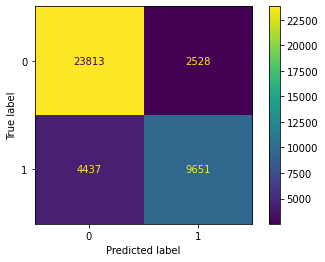

In [14]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay 
import matplotlib.pyplot as plt 
print("Quora Questions")
cm_quora=confusion_matrix(test_y,predictions)
disp_quora=ConfusionMatrixDisplay(confusion_matrix=cm_quora,display_labels=lr.classes_) 
disp_quora.plot() 
plt.show()